In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 讀取wine 資料

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv('wine_data.csv',header=None)      
df_wine.head()     
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # 0為 Class label ,  1之後為13個特徵
print('# of data:',X.shape[0])
print('# of features:',X.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 標準化訓練及測試數據
print(X_train)
stdsc = StandardScaler()  #Standardize features by removing the mean and scaling to unit variance
                          
X_train_std = stdsc.fit_transform(X_train)  # z = (x - u) / s
X_test_std = stdsc.fit_transform(X_test)

print(X_train_std.shape)


# of data: 178
# of features: 13
[[1.371e+01 1.860e+00 2.360e+00 ... 1.110e+00 4.000e+00 1.035e+03]
 [1.222e+01 1.290e+00 1.940e+00 ... 8.600e-01 3.020e+00 3.120e+02]
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]
(124, 13)


In [3]:
df_wine['Class label']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

## 求Features的共變異係數矩陣

Estimate a covariance matrix, given data and weights.

        Covariance indicates the level to which two variables vary together. If we examine N-dimensional samples, X = [x_1, x_2,... x_N]^T, then the covariance matrix element C_{ij} is the covariance of x_i and x_j. The element C_{ii} is the variance of x_i.

In [17]:
#求Features的共變異係數矩陣
cov_mat = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat.shape)
print("共變異係數矩陣=",cov_mat)

共變異係數矩陣.shape= (13, 13)
共變異係數矩陣= [[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0

In [18]:
#求共變異係數矩陣的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# print("特徵向量.shape=",eigen_vecs.shape)
#print("特徵向量=",eigen_vecs)
print("特徵向量=",eigen_vecs.shape)
print("特徵值=",eigen_vals)

特徵向量= (13, 13)
特徵值= [4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [19]:
#計算解釋變異數比率 各特徵值/特徵值總和
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：",var_exp)
print("特徵值變異數比率累加：",cum_var_exp)

各特徵值變異數比率： [0.3732964772349068, 0.18818926106599568, 0.10896790724757796, 0.07724389477124863, 0.0647859460182618, 0.045920138114781475, 0.03986935597634714, 0.025219142607261574, 0.022581806817679666, 0.01830924471952691, 0.016353362655051454, 0.01284270583749274, 0.006420756933868311]
特徵值變異數比率累加： [0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.92349212 0.94607393 0.96438317 0.98073654 0.99357924
 1.        ]


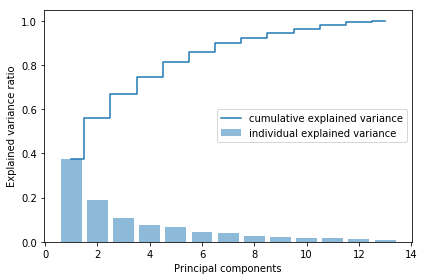

In [20]:
#畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
print(eigen_vals[0])
print(eigen_vecs[:2])

4.892308303273744
[[ 1.46698114e-01  5.04170789e-01 -1.17235150e-01  2.06254611e-01
  -1.87815947e-01 -1.48851318e-01 -1.79263662e-01 -5.54687162e-02
  -4.03054922e-01 -4.17197583e-01  2.75660860e-01  4.03567189e-01
   4.13320786e-04]
 [-2.42245536e-01  2.42168894e-01  1.49946576e-01  1.30489298e-01
   5.68639776e-01 -2.69052764e-01 -5.92636731e-01  3.32731614e-02
  -1.01833706e-01  2.17101488e-01 -8.13845005e-02 -1.52474999e-01
  -8.78560762e-02]]


In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# print("特徵值，特徵向量length：",len(eigen_pairs))
#print("特徵值，特徵向量：",eigen_pairs)

# Sort the (eigenvalue, eigenvector) tuples by eigenvalue from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
#print("特徵值，特徵向量排序：",eigen_pairs.sort(key=lambda k: k[0], reverse=True))
#保留兩個最具影響力的特徵向量組成13x2的投影矩陣 W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


## 畫出PCA轉換後的數據集散點圖

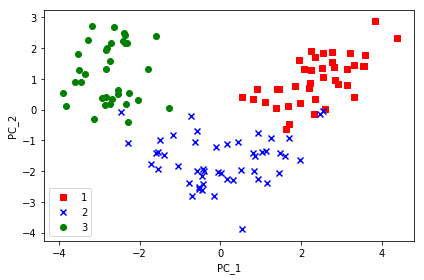

In [25]:

#(124x13)*(13x2)=(124x2)
X_train_pca = X_train_std.dot(w)


colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for label, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == label, 0], 
                X_train_pca[y_train == label, 1], 
                c=c, label=label, marker=m)

plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [26]:
##劃出決策分布圖
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

## #使用LogisticRegression 並用兩個 PCA主成分做訓練分類 

C:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value f

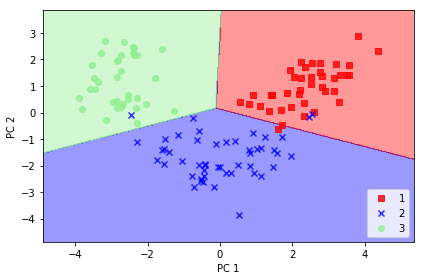

In [27]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#print(y_train)
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

C:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value f

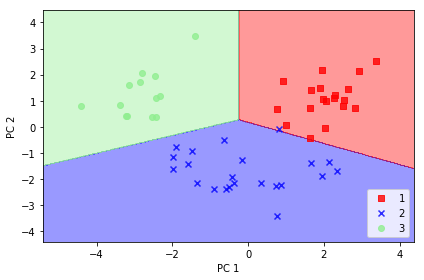

In [28]:
#使用LogisticRegression 並用兩個PCA主成分做測試分類 
X_test_pca = X_test_std.dot(w)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_test_pca, y_test)
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()